-------------------------------------------------------
Method: original
-------------------------------------------------------
Elapsed Time: 1294.9280529022217
Ratio of Prune (original): 0.0 
Highest Score: -212.75


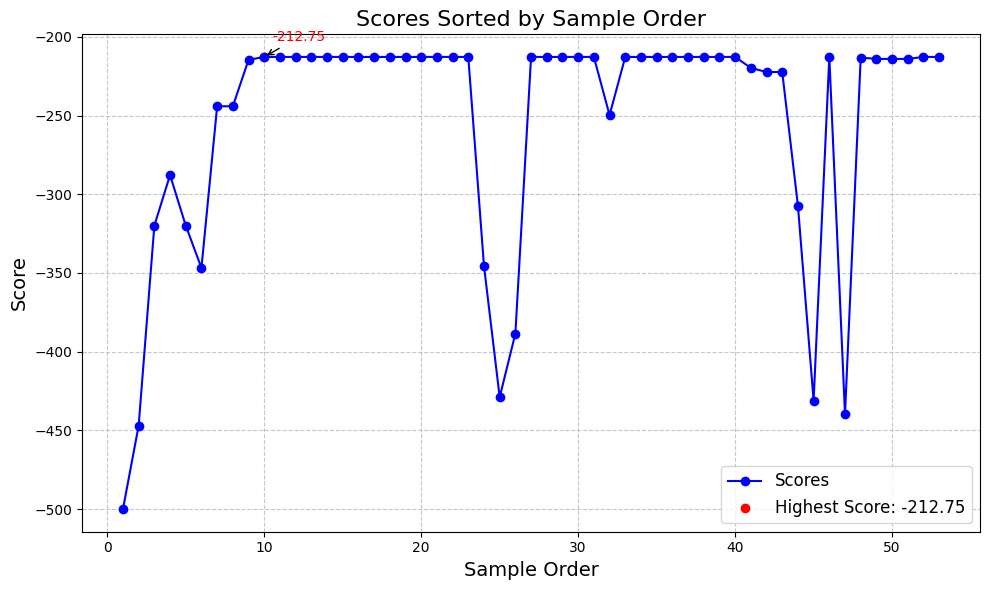

-------------------------------------------------------
Method: similarity
-------------------------------------------------------
Elapsed Time: 1009.0990052223206
Ratio of Prune (similarity): 0.5384615384615383 
Highest Score: -212.7


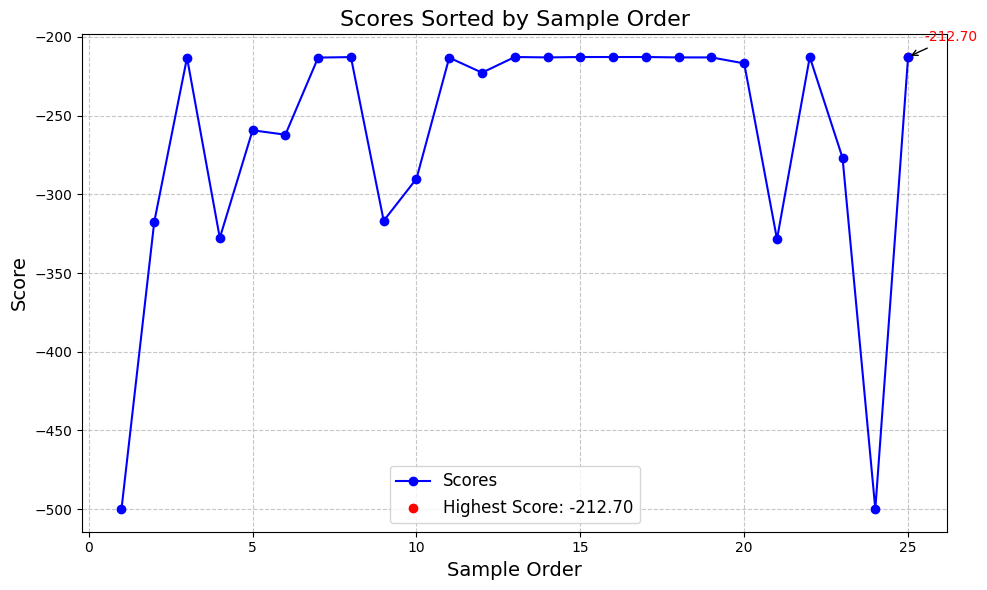

-------------------------------------------------------
Method: hash
-------------------------------------------------------
Elapsed Time: 1227.2051558494568
Ratio of Prune (hash): 0.0 
Highest Score: -212.75


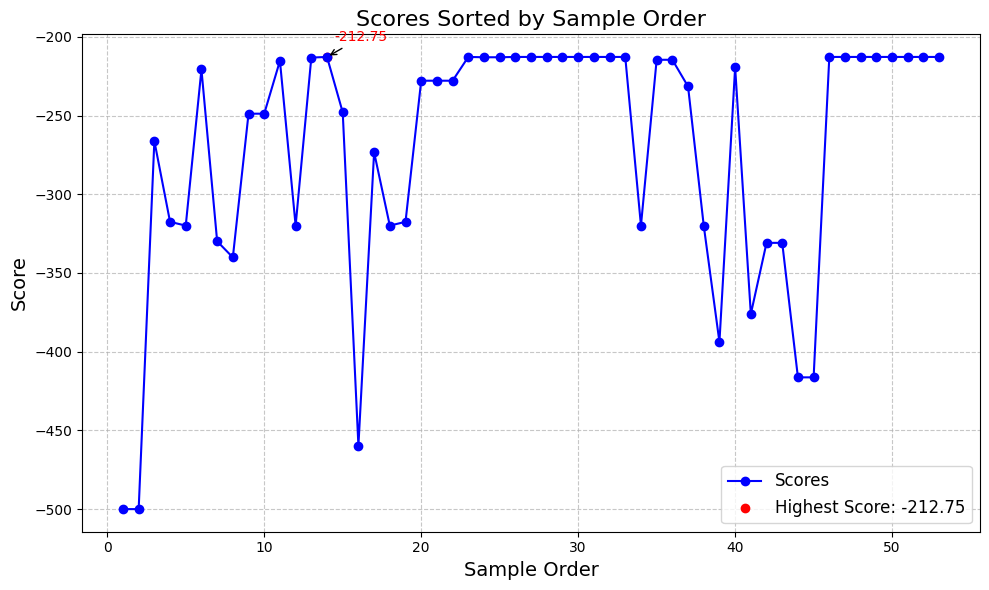

-------------------------------------------------------
Method: ai_agent
-------------------------------------------------------
elapsed_time.json not found.
Ratio of Prune (ai_agent): 0.5576923076923077 
Highest Score: -212.75


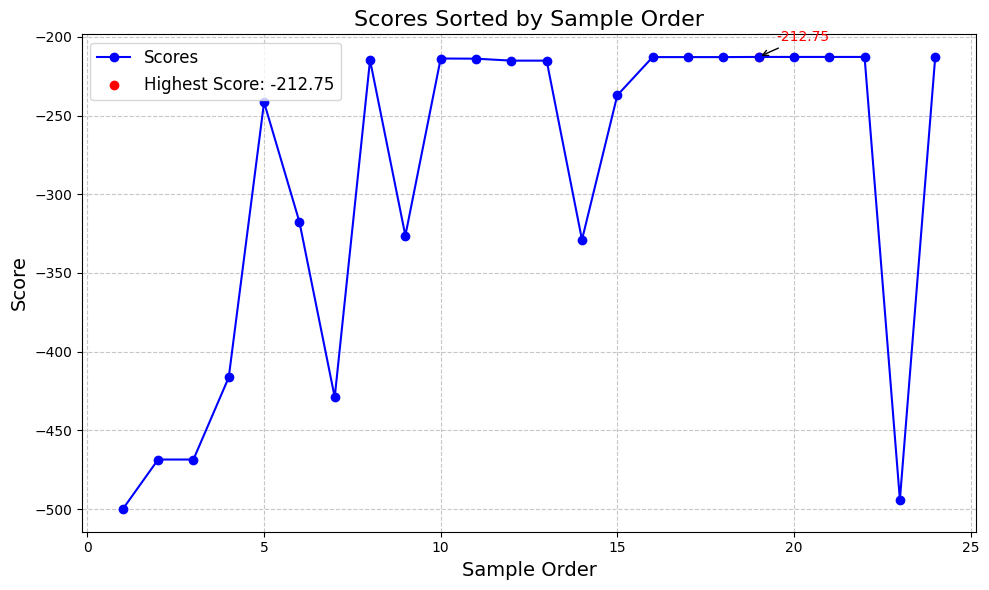

In [48]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

methods = ['original','similarity','hash', 'ai_agent']

real_sample_szie = 52


for method in methods:
    print("-------------------------------------------------------")
    print(f"Method: {method}")
    print("-------------------------------------------------------")
    # Path to the directory
    directory_path = f"./logs/funsearch_llm_{method}/samples"

    # Count JSON files
    json_files = [file for file in os.listdir(directory_path) if file.endswith('.json')]
    json_file_count = len(json_files)
    funsearch_llm_hash_prune_ratio = ( (real_sample_szie+1 -json_file_count)/real_sample_szie+1) -1
    # Load elapsed_time.json and get the elapsed_time

    elapsed_time_path = os.path.join(f"./logs/funsearch_llm_{method}/", "elapsed_time.json")
    if os.path.exists(elapsed_time_path):
        with open(elapsed_time_path, 'r') as file:
            elapsed_time_data = json.load(file)
            elapsed_time = elapsed_time_data.get("elapsed_time", "N/A")
            print(f"Elapsed Time: {elapsed_time}")
    else:
        print("elapsed_time.json not found.")

    print(f"Ratio of Prune ({method}): {funsearch_llm_hash_prune_ratio} ")



            # Sort JSON files by 'sample_order' and save 'score' to a list
    scores = []
    sorted_files = sorted(json_files, key=lambda f: json.load(open(os.path.join(directory_path, f), 'r')).get('sample_order', float('inf')))
    for json_file in sorted_files:
        json_file_path = os.path.join(directory_path, json_file)
        with open(json_file_path, 'r') as file:
            data = json.load(file)
            score = data.get('score', None)
            scores.append(score if score is not None else scores[-1] if scores else None)

    max_score = max(scores)
    max_index = scores.index(max_score) + 1
    print(f"Highest Score: {max_score}")

    # Plot the scores as a line graph, indexing from 1
    plt.figure(figsize=(10,6))
    plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b', label='Scores')

    # Highlight the highest point
    
    plt.scatter(max_index, max_score, color='r', label=f'Highest Score: {max_score:.2f}')
    plt.annotate(f'{max_score:.2f}', 
                 xy=(max_index, max_score), 
                 xytext=(max_index + 0.5, max_score + 10),
                 arrowprops=dict(facecolor='red', arrowstyle='->'),
                 fontsize=10, color='red')

    # Add titles and labels
    plt.title('Scores Sorted by Sample Order', fontsize=16)
    plt.xlabel('Sample Order', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
